In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
data = pd.read_csv('../data/Final_Regression.csv')

In [12]:
# Select the features and target variable
features = ['budget', 'release_month', 'release_year', 
            'belongs_to_collection', 'Gender Ratio', 'Average Actor Age', 
            'runtime', 'production_company_name_encoded', 'director_encoded']

# features = ['release_month', 'release_year', 
#             'belongs_to_collection', 'actor_0_name_encoded', 'actor_1_name_encoded', 
#             'actor_2_name_encoded', 'Gender Ratio', 'Average Actor Age', 
#             'runtime', 'production_company_name_encoded', 'director_encoded']

# features += ['budget']
# Uncomment the genres you want to include
# features += ['Crime', 'Drama', 'War', 'Western', 'Family', 'Thriller', 
#              'Fantasy', 'Mystery', 'Animation', 'Music', 'Romance', 
#              'Adventure', 'History', 'Science Fiction', 'Comedy', 
#              'TV Movie', 'Documentary', 'Horror', 'Action']

# Get the names of the features
feature_names = features
target = 'revenue'

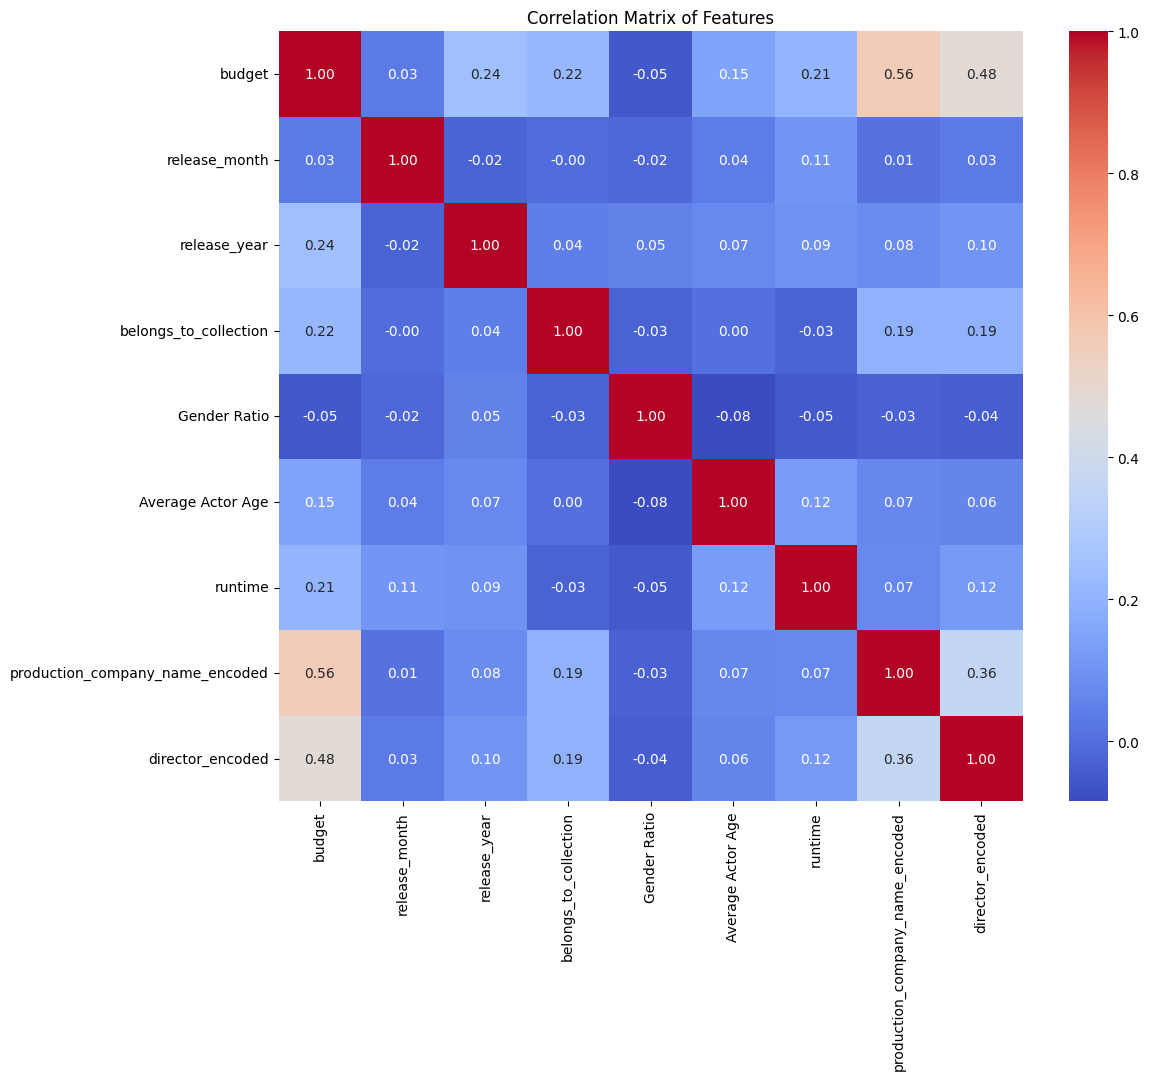

In [13]:

# Assuming you have your data stored in a DataFrame called 'df'
# If not, replace 'df' with the name of your DataFrame

# features = ['release_month', 'release_year', 
#             'belongs_to_collection', 'actor_0_name_encoded', 'actor_1_name_encoded', 
#             'actor_2_name_encoded', 'Gender Ratio', 'Average Actor Age', 
#             'runtime', 'production_company_name_encoded', 'director_encoded']

# Create a correlation matrix
correlation_matrix = data[features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title("Correlation Matrix of Features")

# Show the plot
plt.show()


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [15]:
# Check for missing values in the training data
missing_values = X_train.isnull().sum()
print("Missing values in training data:")
print(missing_values)

# Use SimpleImputer to fill in missing values
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies like 'mean', 'median', or 'most_frequent'

# Fit the imputer to the training data
imputer.fit(X_train)

Missing values in training data:
budget                             0
release_month                      6
release_year                       6
belongs_to_collection              0
Gender Ratio                       0
Average Actor Age                  0
runtime                            0
production_company_name_encoded    0
director_encoded                   0
dtype: int64


SimpleImputer()

In [16]:
# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
# Now, train the model on the imputed data
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_imputed = model.predict(X_test_imputed)

In [17]:
# Print the mean squared error and R-squared value after imputation
print("Mean Squared Error (after imputation):", mean_squared_error(y_test, y_pred_imputed))
print("R-squared (after imputation):", r2_score(y_test, y_pred_imputed))

Mean Squared Error (after imputation): 7465891395922905.0
R-squared (after imputation): 0.6544997356365116


In [18]:
# Get the names of the features
feature_names = X_train.columns

# Print each feature and its corresponding weight
for feature, weight in zip(feature_names, model.coef_):
    print(f"{feature}: {weight}")


budget: 2.149783535276038
release_month: -234359.73838100376
release_year: -128406.24298762603
belongs_to_collection: 55300055.611457236
Gender Ratio: 16233524.07084497
Average Actor Age: -395719.7995324993
runtime: 405366.6811248075
production_company_name_encoded: 0.45336115780886105
director_encoded: 0.8493767523538742
